# Gabor filters

In [1]:
# Torch related imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data visualisation and numerical computing
import matplotlib.pyplot as plt
import numpy as np
import math

# Additional useful imports
import pandas as pd  
import seaborn as sns  
import os  
import sys  
import logging  

import torchvision.transforms as transforms
from torchvision.transforms import functional as TF
from torch.distributions.multivariate_normal import MultivariateNormal
from PIL import Image
from torchvision import transforms
from PIL import Image

In [2]:
# Define a transform to convert images to PyTorch tensors
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalise to [-1, 1] range
])

# Load image using PIL
image_path = 'test_image1.png'
image = Image.open(image_path)

# Apply the transform to the image
image_tensor = transform(image)

In [3]:
def build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi):
    """Create a Gabor kernel with specified parameters."""
    x_grid = np.linspace(-ksize // 2, ksize // 2, ksize)
    y_grid = np.linspace(-ksize // 2, ksize // 2, ksize)
    x, y = np.meshgrid(x_grid, y_grid)
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)
    g = np.exp(-0.5 * (rotx**2 + gamma**2 * roty**2) / sigma**2) * np.cos(2 * np.pi * rotx / lambd + psi)
    return torch.tensor(g, dtype=torch.float32)

def apply_gabor_filter(image_tensor, kernel):
    """Apply Gabor filter to the image tensor."""
    kernel_tensor = kernel.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    filtered = F.conv2d(image_tensor.unsqueeze(0), kernel_tensor, padding=ksize // 2)
    return filtered[0, 0]


In [4]:
def create_combined_gabor_image(image_tensor, ksize, sigma, lambd, gamma, psi, num_orientations):

    # Create Gabor kernels for different orientations and apply them
    combined_filtered = torch.zeros_like(image_tensor)
    for i in range(num_orientations):
        theta = i * np.pi / num_orientations
        gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)
        filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)
        combined_filtered += filtered_image

    # Average the filtered images
    combined_filtered /= num_orientations

    return combined_filtered

# Example usage
ksize = 21  # Kernel size
sigma = 5.0
lambd = 10.0
gamma = 0.5
psi = 0
num_orientations = 8  # Number of orientations

combined_image = create_combined_gabor_image(image_tensor, ksize, sigma, lambd, gamma, psi, num_orientations)

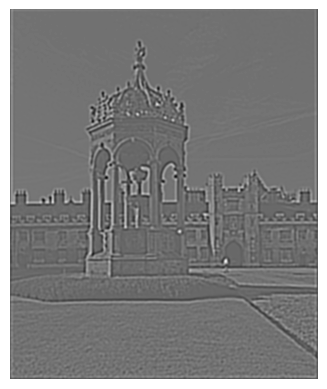

In [5]:
# Squeeze the tensor or select the first channel
plt.imshow(combined_image.squeeze().numpy(), cmap='gray')
plt.axis("off")
plt.show()

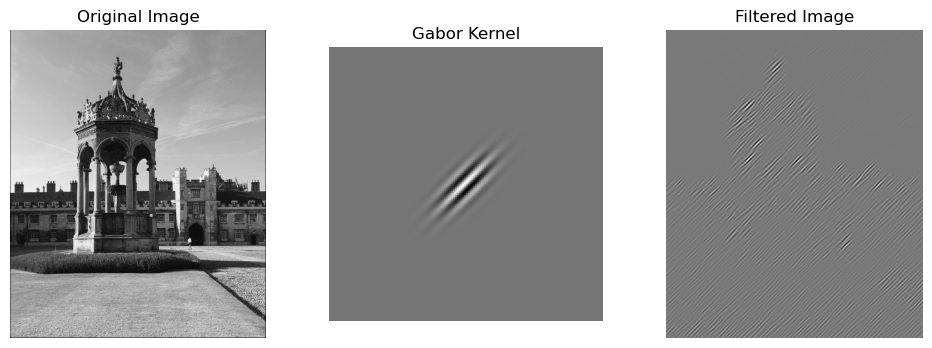

In [6]:
# Define the Gabor kernel parameters
ksize = 150  # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi / 4  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor1")
plt.show()

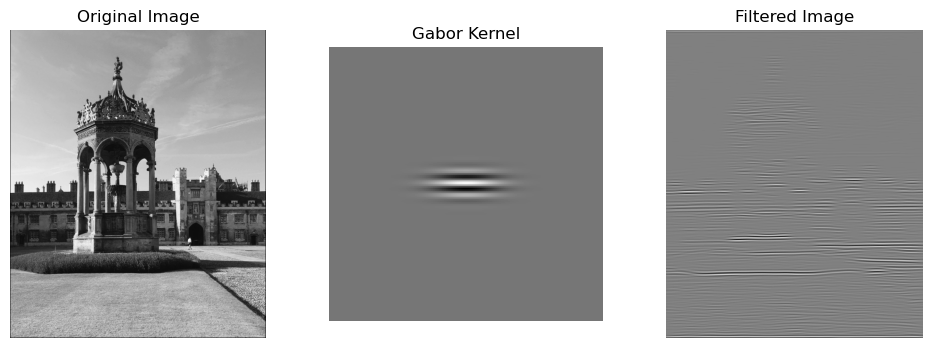

In [7]:
# Define the Gabor kernel parameters
ksize = 150  # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi / 2  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor2")
plt.show()

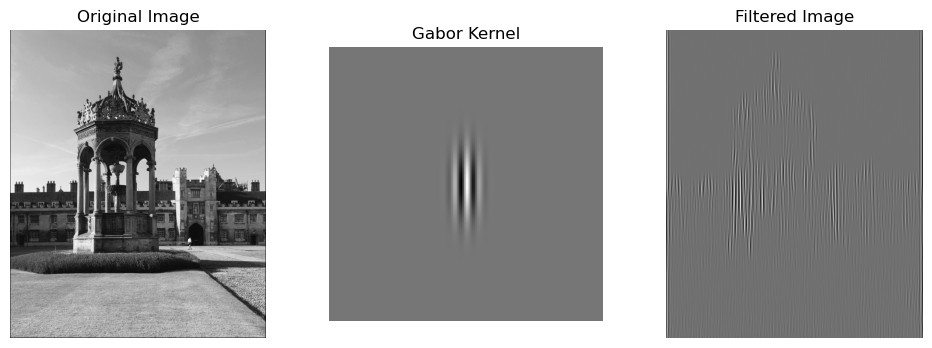

In [8]:
# Define the Gabor kernel parameters
ksize = 150  # Size of the kernel
sigma = 5   # Standard deviation of the Gaussian function
theta = np.pi  # Orientation
lambd = 7  # Wavelength
gamma = 0.4 # Spatial aspect ratio
psi = 0.6     # Phase offset

# Generate Gabor kernel
gabor_kernel = build_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

# Apply Gabor filter
filtered_image = apply_gabor_filter(image_tensor, gabor_kernel)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_tensor[0], cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gabor_kernel, cmap='gray')
plt.axis("off")
plt.title('Gabor Kernel')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')

plt.savefig("Gabor2")
plt.show()